In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

from spellchecker import SpellChecker


In [2]:
from spellchecker import SpellChecker

In [3]:
import spellchecker
print(spellchecker.__file__)

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\spellchecker\__init__.py


In [4]:
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import sys
print(sys.executable)

c:\Users\moham\AppData\Local\Programs\Python\Python313\python.exe


In [6]:
char_list = []
with open("train.txt","r",encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        print(line)
        char_list.append(line) 
#print(char_list)

i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love
i am feeling grouchy;anger
ive been feeling a little burdened lately wasnt sure why that was;sadness
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise
i feel as confused about life as a teenager or as jaded as a year old man;fear
i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy
i feel romantic too;love
i feel like i have to make the suffering i m seeing mean something;sadness
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy
i think it s the easiest time of year to feel dissatisfied;anger
i fee

In [7]:
len(char_list)

16000

In [8]:
value = []
target = []
for i in range(len(char_list)):
    splited = char_list[i].split(";")
    value.append(splited[0])
    target.append(splited[1])

# convert target to value:

In [51]:
print(set(target))

{'fear', 'love', 'joy', 'anger', 'surprise', 'sadness'}


# create DataFrame:

In [9]:
df = pd.DataFrame(value,columns=["value"])
df["target"] = target

In [10]:
df

value   target
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]

In [11]:
df["target"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

<Axes: xlabel='target'>

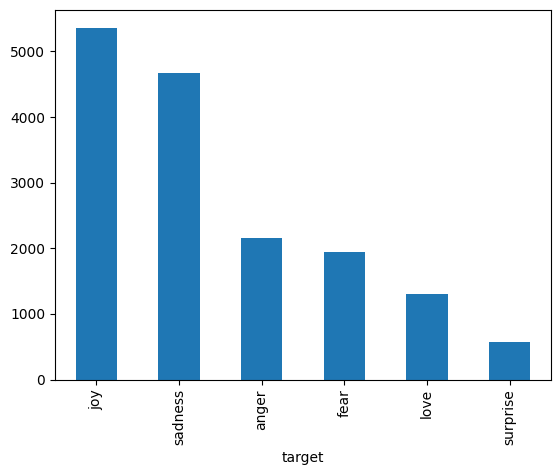

In [12]:
df["target"].value_counts().plot(kind="bar")

In [54]:
df["target"] = df["target"].replace({"joy":0,
                    "sadness":1, 
                    "anger":2, 
                    "fear":3, 
                    "love":4, 
                    "surprise":5})

C:\Users\moham\AppData\Local\Temp\ipykernel_25644\1898812074.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["target"] = df["target"].replace({"joy":0,


In [55]:
df["target"]

0        1
1        1
2        2
3        4
4        2
        ..
15995    1
15996    1
15997    0
15998    2
15999    1
Name: target, Length: 16000, dtype: int64

In [13]:
texts = df["value"].values

In [14]:
texts

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      shape=(16000,), dtype=object)

# loewers:

In [15]:
def lowers(lenght,data):
    for i in range(lenght):
        data[i] = data[i].lower()

    return data
texts = lowers(lenght=texts.shape[0],data=texts)
texts
    

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      shape=(16000,), dtype=object)

# Remove symbols:

In [16]:
def remove_sym(lenght,data):
    for i in range(lenght):
        data[i] = re.sub(r'[^\w\s]', '',data[i])
    return data
texts = remove_sym(texts.shape[0],texts)
texts

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      shape=(16000,), dtype=object)

# Tokenizing:

In [17]:
nltk.download('punkt_tab')
def word_tokeniz(lenght,texts):
    l1 = []
    for i in range(lenght):
        wt = word_tokenize(text=texts[i],language="english")
        l1.append(wt)
    return l1
texts = word_tokeniz(lenght=texts.shape[0],texts=texts)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
[w for w in texts[i] if len(w)>2]


['know', 'lot', 'but', 'feel', 'stupid', 'because', 'can', 'not', 'portray']

# remove 1 letters

In [19]:
def remove_one_phrase(data):
    l1 = []
    for i in range(len(data)):
        token = [w for w in data[i] if len(w)>1 or w in ["a","i"]]
        l1.append(token)
        token = []
    return l1
texts = remove_one_phrase(texts)
texts



[['i', 'didnt', 'feel', 'humiliated'],
 ['i',
  'can',
  'go',
  'from',
  'feeling',
  'so',
  'hopeless',
  'to',
  'so',
  'damned',
  'hopeful',
  'just',
  'from',
  'being',
  'around',
  'someone',
  'who',
  'cares',
  'and',
  'is',
  'awake'],
 ['im',
  'grabbing',
  'a',
  'minute',
  'to',
  'post',
  'i',
  'feel',
  'greedy',
  'wrong'],
 ['i',
  'am',
  'ever',
  'feeling',
  'nostalgic',
  'about',
  'the',
  'fireplace',
  'i',
  'will',
  'know',
  'that',
  'it',
  'is',
  'still',
  'on',
  'the',
  'property'],
 ['i', 'am', 'feeling', 'grouchy'],
 ['ive',
  'been',
  'feeling',
  'a',
  'little',
  'burdened',
  'lately',
  'wasnt',
  'sure',
  'why',
  'that',
  'was'],
 ['ive',
  'been',
  'taking',
  'or',
  'milligrams',
  'or',
  'times',
  'recommended',
  'amount',
  'and',
  'ive',
  'fallen',
  'asleep',
  'a',
  'lot',
  'faster',
  'but',
  'i',
  'also',
  'feel',
  'like',
  'so',
  'funny'],
 ['i',
  'feel',
  'as',
  'confused',
  'about',
  'life',


# Spell Checker (apastoroph)

In [20]:
def apastoroph(data,lenght):
    l1 = []
    spell = SpellChecker()
    for i in range(lenght):
        tokens = [spell.correction(w) for w in data[i]]
        l1.append(tokens)
        tokens = []
    return l1

texts = apastoroph(texts,lenght=len(texts))

In [21]:
no_apas = {
    "don't": "do not",
    "didn't": "did not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not",
    "can't": "can not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "mightn't": "might not",
    "mustn't": "must not",
    "needn't": "need not",
    "won't": "will not",
    "ain't": "is not",
    "shan't": "shall not",
}

def convert(data=texts,aps=no_apas,lenght=len(texts)):
    l1 = []
    for i in range(lenght):
        tokens = []
        for j in range(len(data[i])):
            if data[i][j] in aps.keys():
                tokens.append(aps[data[i][j]])
            else:
                tokens.append(data[i][j])

        l1.append(tokens)
        tokens = []
    return l1
texts = convert()


In [22]:
texts

[['i', 'did not', 'feel', 'humiliated'],
 ['i',
  'can',
  'go',
  'from',
  'feeling',
  'so',
  'hopeless',
  'to',
  'so',
  'damned',
  'hopeful',
  'just',
  'from',
  'being',
  'around',
  'someone',
  'who',
  'cares',
  'and',
  'is',
  'awake'],
 ['i',
  'grabbing',
  'a',
  'minute',
  'to',
  'post',
  'i',
  'feel',
  'greedy',
  'wrong'],
 ['i',
  'am',
  'ever',
  'feeling',
  'nostalgic',
  'about',
  'the',
  'fireplace',
  'i',
  'will',
  'know',
  'that',
  'it',
  'is',
  'still',
  'on',
  'the',
  'property'],
 ['i', 'am', 'feeling', 'grouchy'],
 ['give',
  'been',
  'feeling',
  'a',
  'little',
  'burdened',
  'lately',
  'want',
  'sure',
  'why',
  'that',
  'was'],
 ['give',
  'been',
  'taking',
  'or',
  'milligrams',
  'or',
  'times',
  'recommended',
  'amount',
  'and',
  'give',
  'fallen',
  'asleep',
  'a',
  'lot',
  'faster',
  'but',
  'i',
  'also',
  'feel',
  'like',
  'so',
  'funny'],
 ['i',
  'feel',
  'as',
  'confused',
  'about',
  'life

# remove Stopwords:

In [23]:
#def rm_stopwords(data,lenght):
#    l1 = []
#    for i in range(lenght):
#        stop_words = set(stopwords.words('english'))
#        tokens = [word for word in data[i] if word not in stop_words]
#        l1.append(tokens)
#        tokens = []
#    return l1

#texts = rm_stopwords(texts,len(texts))   

In [24]:
def remove_nan(data,lenght):
    l1 = []
    for i in range(lenght):
        tokens = []
        for j in range(len(data[i])):
            if data[i][j] in [None,""]:
                pass
            else:
                tokens.append(data[i][j])
        l1.append(tokens)
        tokens = []
    return l1
texts = remove_nan(texts,len(texts))
texts

[['i', 'did not', 'feel', 'humiliated'],
 ['i',
  'can',
  'go',
  'from',
  'feeling',
  'so',
  'hopeless',
  'to',
  'so',
  'damned',
  'hopeful',
  'just',
  'from',
  'being',
  'around',
  'someone',
  'who',
  'cares',
  'and',
  'is',
  'awake'],
 ['i',
  'grabbing',
  'a',
  'minute',
  'to',
  'post',
  'i',
  'feel',
  'greedy',
  'wrong'],
 ['i',
  'am',
  'ever',
  'feeling',
  'nostalgic',
  'about',
  'the',
  'fireplace',
  'i',
  'will',
  'know',
  'that',
  'it',
  'is',
  'still',
  'on',
  'the',
  'property'],
 ['i', 'am', 'feeling', 'grouchy'],
 ['give',
  'been',
  'feeling',
  'a',
  'little',
  'burdened',
  'lately',
  'want',
  'sure',
  'why',
  'that',
  'was'],
 ['give',
  'been',
  'taking',
  'or',
  'milligrams',
  'or',
  'times',
  'recommended',
  'amount',
  'and',
  'give',
  'fallen',
  'asleep',
  'a',
  'lot',
  'faster',
  'but',
  'i',
  'also',
  'feel',
  'like',
  'so',
  'funny'],
 ['i',
  'feel',
  'as',
  'confused',
  'about',
  'life

In [25]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [27]:
def tagging(data,lenght):
    l1 = []
    for i in range(lenght):
        pos = pos_tag(data[i])
        l1.append(pos)
        pos = []
    return l1
texts = tagging(texts,len(texts))
texts

[[('i', 'NN'), ('did not', 'VBP'), ('feel', 'NN'), ('humiliated', 'VBD')],
 [('i', 'NN'),
  ('can', 'MD'),
  ('go', 'VB'),
  ('from', 'IN'),
  ('feeling', 'VBG'),
  ('so', 'RB'),
  ('hopeless', 'JJ'),
  ('to', 'TO'),
  ('so', 'RB'),
  ('damned', 'JJ'),
  ('hopeful', 'JJ'),
  ('just', 'RB'),
  ('from', 'IN'),
  ('being', 'VBG'),
  ('around', 'IN'),
  ('someone', 'NN'),
  ('who', 'WP'),
  ('cares', 'VBZ'),
  ('and', 'CC'),
  ('is', 'VBZ'),
  ('awake', 'JJ')],
 [('i', 'NN'),
  ('grabbing', 'VBG'),
  ('a', 'DT'),
  ('minute', 'NN'),
  ('to', 'TO'),
  ('post', 'VB'),
  ('i', 'JJ'),
  ('feel', 'NN'),
  ('greedy', 'NN'),
  ('wrong', 'JJ')],
 [('i', 'NN'),
  ('am', 'VBP'),
  ('ever', 'RB'),
  ('feeling', 'VBG'),
  ('nostalgic', 'JJ'),
  ('about', 'IN'),
  ('the', 'DT'),
  ('fireplace', 'NN'),
  ('i', 'NN'),
  ('will', 'MD'),
  ('know', 'VB'),
  ('that', 'IN'),
  ('it', 'PRP'),
  ('is', 'VBZ'),
  ('still', 'RB'),
  ('on', 'IN'),
  ('the', 'DT'),
  ('property', 'NN')],
 [('i', 'NN'), ('am', 'VBP

In [28]:
def load_tag(data,lenght):
    tagges = []
    tag_sent = []
    for i in range(lenght):
        for j,z in data[i]:
            tag_sent.append(z)

        tagges.append(tag_sent)
        tag_sent = []
    return tagges

tags = load_tag(texts,len(texts))




In [29]:
texts[0][1][0]

'did not'

In [30]:
dictionary = {"N":"n",
              "V":"v",
              "J":"a",
              "R":"r"}

In [31]:
dictionary.keys()

dict_keys(['N', 'V', 'J', 'R'])

In [32]:
texts[0][1] = list(texts[0][1])

In [33]:
dictionary[texts[0][1][1][0]]

'v'

In [34]:
def convert_tuple_to_list(data, lenght):
    for i in range(lenght):
        for j in range(len(data[i])):
            data[i][j] = list(data[i][j])
    return data
texts = convert_tuple_to_list(texts,len(texts))


In [35]:
texts

[[['i', 'NN'], ['did not', 'VBP'], ['feel', 'NN'], ['humiliated', 'VBD']],
 [['i', 'NN'],
  ['can', 'MD'],
  ['go', 'VB'],
  ['from', 'IN'],
  ['feeling', 'VBG'],
  ['so', 'RB'],
  ['hopeless', 'JJ'],
  ['to', 'TO'],
  ['so', 'RB'],
  ['damned', 'JJ'],
  ['hopeful', 'JJ'],
  ['just', 'RB'],
  ['from', 'IN'],
  ['being', 'VBG'],
  ['around', 'IN'],
  ['someone', 'NN'],
  ['who', 'WP'],
  ['cares', 'VBZ'],
  ['and', 'CC'],
  ['is', 'VBZ'],
  ['awake', 'JJ']],
 [['i', 'NN'],
  ['grabbing', 'VBG'],
  ['a', 'DT'],
  ['minute', 'NN'],
  ['to', 'TO'],
  ['post', 'VB'],
  ['i', 'JJ'],
  ['feel', 'NN'],
  ['greedy', 'NN'],
  ['wrong', 'JJ']],
 [['i', 'NN'],
  ['am', 'VBP'],
  ['ever', 'RB'],
  ['feeling', 'VBG'],
  ['nostalgic', 'JJ'],
  ['about', 'IN'],
  ['the', 'DT'],
  ['fireplace', 'NN'],
  ['i', 'NN'],
  ['will', 'MD'],
  ['know', 'VB'],
  ['that', 'IN'],
  ['it', 'PRP'],
  ['is', 'VBZ'],
  ['still', 'RB'],
  ['on', 'IN'],
  ['the', 'DT'],
  ['property', 'NN']],
 [['i', 'NN'], ['am', 'VBP

In [36]:
texts[0][0][1]

'NN'

In [37]:
def fix_tag(data,lenght,dictionary):
    for i in range(lenght):
        for j in range(len(data[i])):
            try:
                data[i][j][1] = dictionary[data[i][j][1][0]]
            except:
                data[i][j][1] ="n"
    return data

texts = fix_tag(texts,len(texts),dictionary=dictionary)
    

In [38]:
texts

[[['i', 'n'], ['did not', 'v'], ['feel', 'n'], ['humiliated', 'v']],
 [['i', 'n'],
  ['can', 'n'],
  ['go', 'v'],
  ['from', 'n'],
  ['feeling', 'v'],
  ['so', 'r'],
  ['hopeless', 'a'],
  ['to', 'n'],
  ['so', 'r'],
  ['damned', 'a'],
  ['hopeful', 'a'],
  ['just', 'r'],
  ['from', 'n'],
  ['being', 'v'],
  ['around', 'n'],
  ['someone', 'n'],
  ['who', 'n'],
  ['cares', 'v'],
  ['and', 'n'],
  ['is', 'v'],
  ['awake', 'a']],
 [['i', 'n'],
  ['grabbing', 'v'],
  ['a', 'n'],
  ['minute', 'n'],
  ['to', 'n'],
  ['post', 'v'],
  ['i', 'a'],
  ['feel', 'n'],
  ['greedy', 'n'],
  ['wrong', 'a']],
 [['i', 'n'],
  ['am', 'v'],
  ['ever', 'r'],
  ['feeling', 'v'],
  ['nostalgic', 'a'],
  ['about', 'n'],
  ['the', 'n'],
  ['fireplace', 'n'],
  ['i', 'n'],
  ['will', 'n'],
  ['know', 'v'],
  ['that', 'n'],
  ['it', 'n'],
  ['is', 'v'],
  ['still', 'r'],
  ['on', 'n'],
  ['the', 'n'],
  ['property', 'n']],
 [['i', 'n'], ['am', 'v'], ['feeling', 'v'], ['grouchy', 'n']],
 [['give', 'v'],
  ['been'

In [41]:
def convert_list_to_tuple(data, lenght):
    for i in range(lenght):
        for j in range(len(data[i])):
            data[i][j] = tuple(data[i][j])
    return data
texts = convert_list_to_tuple(texts,len(texts))

# Lemmatizing:

In [46]:
def lemmatizing(data,lenght):
    l1 = []
    lemmatizer = WordNetLemmatizer()
    for i in range(lenght):
        tokens = []
        for j in range(len(data[i])):
            lemmas = lemmatizer.lemmatize(data[i][j][0],data[i][j][1])
            tokens.append(lemmas)
        l1.append(tokens)
        tokens = []
    return l1
texts = lemmatizing(texts,len(texts))

        

In [47]:
texts[1][1]

'can'

In [62]:
texts[0][1]

'did not'

In [68]:
def sentence(data,lenght):
    l1 = []
    for i in range(lenght):
        sent = ""
        for j in range(len(data[i])):
            sent += data[i][j]
            sent += " "
        sent = sent.strip()
        l1.append(sent)
    return l1
texts = sentence(texts,len(texts))
texts

['i did not feel humiliate',
 'i can go from feel so hopeless to so damned hopeful just from be around someone who care and be awake',
 'i grab a minute to post i feel greedy wrong',
 'i be ever feel nostalgic about the fireplace i will know that it be still on the property',
 'i be feel grouchy',
 'give be feel a little burdened lately want sure why that be',
 'give be take or milligram or time recommended amount and give fall asleep a lot faster but i also feel like so funny',
 'i feel a confuse about life a a teenager or as jade a a year old man',
 'i have be with patron for year i feel that patron have perform well and make a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i see mean something',
 'i do feel that run be a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it the easy time of year to feel dissatisfied',
 'i feel low energy i just thirsty',
 'i have immense sympathy with the general point but a

In [81]:
def check_padd(data,lenght):
    l1 = []
    for i in range(lenght):
        l1.append(len(data[i]))

    return max(l1)
maximom = check_padd(texts,len(texts))
maximom


297

In [74]:
x_train, x_test, y_train, y_test = train_test_split(texts,df["target"],test_size=0.2)

In [56]:
from transformers import AutoTokenizer

In [58]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [75]:
x_train

['i receive the good news in joy like the magi or do i feel threaten by god message like herod',
 'i still enjoy it because i do not feel like i be be beat over the head with a you be dumb and can figure this out on your own stick',
 'i should feel burden that the slight touch from that body even now still linger upon my skin',
 'i sit there in our living room feel the sun come through the window cuddle my gorgeous puppy and cry',
 'i think my hair be feel confused',
 'i just feel that date be an important part of grow up',
 'i feel i have benefit more from last year creative future but could this be in part that the information i have learn last year i be already put into practice and therefore this year session be what i be already do rather than inspire me to start',
 'this happen when i could not get into the school i have initially want',
 'i can take medication because it trigger i have to be really at the point of i can stand what i feel anymore just so i can get past that barri

In [82]:
x_train_tok = tokenizer(x_train, padding=True, truncation=True, max_length=297, return_tensors="pt")
x_test_tok = tokenizer(x_test, padding=True, truncation=True, max_length=297, return_tensors="pt")

In [83]:
x_train_tok

{'input_ids': tensor([[ 101, 1045, 4374,  ...,    0,    0,    0],
        [ 101, 1045, 2145,  ...,    0,    0,    0],
        [ 101, 1045, 2323,  ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2514,  ...,    0,    0,    0],
        [ 101, 1045, 2022,  ...,    0,    0,    0],
        [ 101, 1045, 2514,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [84]:
from transformers import AutoModelForSequenceClassification

In [85]:
num_labels = len(set(target))
model = AutoModelForSequenceClassification.from_pretrained(model_name,num_labels=num_labels)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
